In [1]:
import numpy as np
from pathlib import Path
import statistics
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'helvetica',
'weight' : 'normal',
'size' : 20}
matplotlib.rc('font', **font)

In [2]:
# define a function to read log file
def readinfo(foldername):
    for file in Path(foldername).iterdir():
        if str(file).endswith('stdout'):
            stdout = open(str(file),'r+', encoding="utf-8")
    lines = stdout.readlines()
    for i,line in zip(range(0,len(lines)),lines):
        if 'Training will be stopped after' in line:
            line = line.split(" ")
            epochs = int(line[5])
        if 'TRAINING LOOP' in line:
            T_line = i
    
    return epochs, lines[T_line+25:]

# define a function to get the error
def get_error(epochs, lines):
    E_train = []
    F_train = []
    E_test = []
    F_test = []
    
    for i in range(0,epochs):
        k = i * 4
        energy = lines[k+1].split(" ")
        force = lines[k+2].split(" ")
        energy = list(filter(None,energy))
        force = list(filter(None,force))
        etrain = float(energy[3]) * 1000
        etest = float(energy[4]) * 1000
        ftrain = float(force[3])
        ftest = float(force[4])
        E_train.append(etrain)
        E_test.append(etest)
        F_train.append(ftrain)
        F_test.append(ftest)
        
    return E_train, E_test, F_train, F_test

#define the function to plot rmse
def plot_4fig(epochs, E_train, E_test, F_train, F_test, figname):
    fig, ((ax,bx),(cx,dx)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
    ax.set_title(figname)
    x=range(0,epochs)
    ax.plot(x,E_train)
    bx.plot(x,E_test)
    cx.plot(x,F_train)
    dx.plot(x,F_test)
    for pic in [ax, bx, cx, dx]:
        pic.set_xlabel("Epochs")
        pic.grid()
    ax.set_ylim(0,20)
    bx.set_ylim(0,20)
    cx.set_ylim(0,0.15)
    dx.set_ylim(0,0.15)
    ax.set_ylabel("Training Energy Error (meV/atom)")
    bx.set_ylabel("Testing Energy Error (meV/atom)")
    cx.set_ylabel("Training Force Error (eV/Å)")
    dx.set_ylabel("Tesing Force Error (eV/Å)")
    
    # get the mean value of errors
    m_Etrain = np.mean(E_train[500:])
    m_Etest = np.mean(E_test[500:])
    m_Ftrain = np.mean(F_train[500:])
    m_Ftest = np.mean(F_test[500:])
    ax.text(0.9, 0.1, np.round(m_Etrain,4), transform=ax.transAxes, fontsize='large', horizontalalignment='right', verticalalignment='bottom')
    bx.text(0.9, 0.1, np.round(m_Etest,4), transform=bx.transAxes, fontsize='large', horizontalalignment='right', verticalalignment='bottom')
    cx.text(0.9, 0.1, np.round(m_Ftrain,6), transform=cx.transAxes, fontsize='large', horizontalalignment='right', verticalalignment='bottom')
    dx.text(0.9, 0.1, np.round(m_Ftest,6), transform=dx.transAxes, fontsize='large', horizontalalignment='right', verticalalignment='bottom')
    
    plt.savefig(figname,dpi=300)
    plt.show()

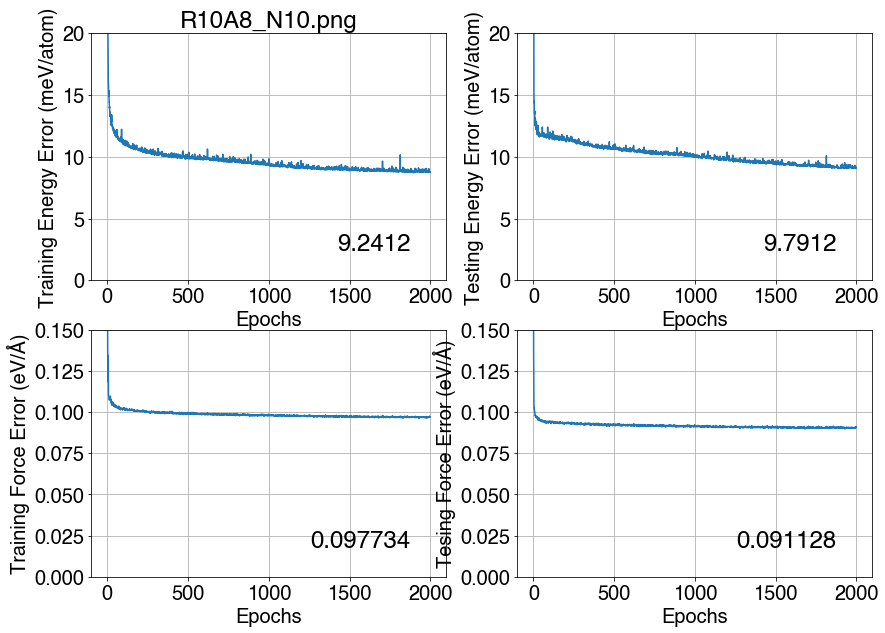

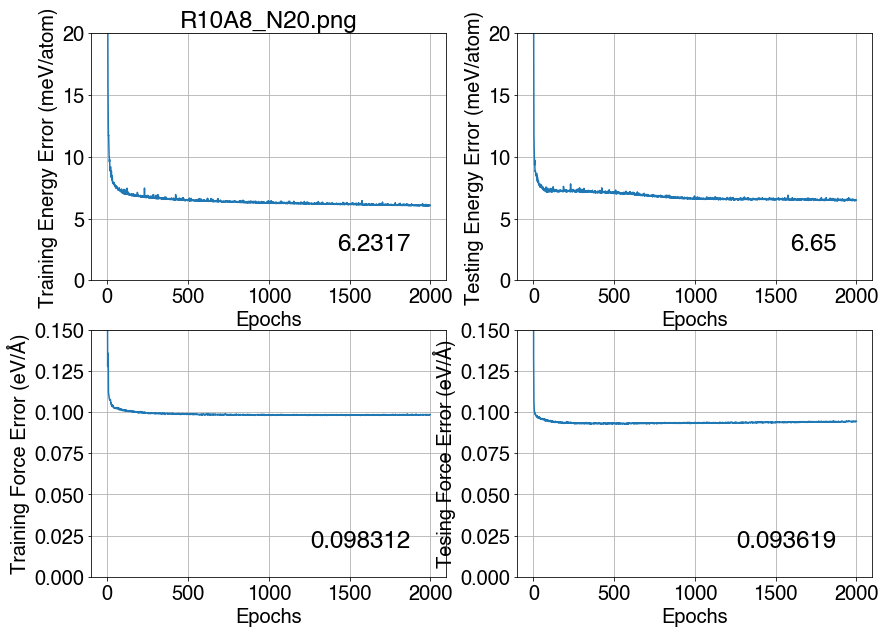

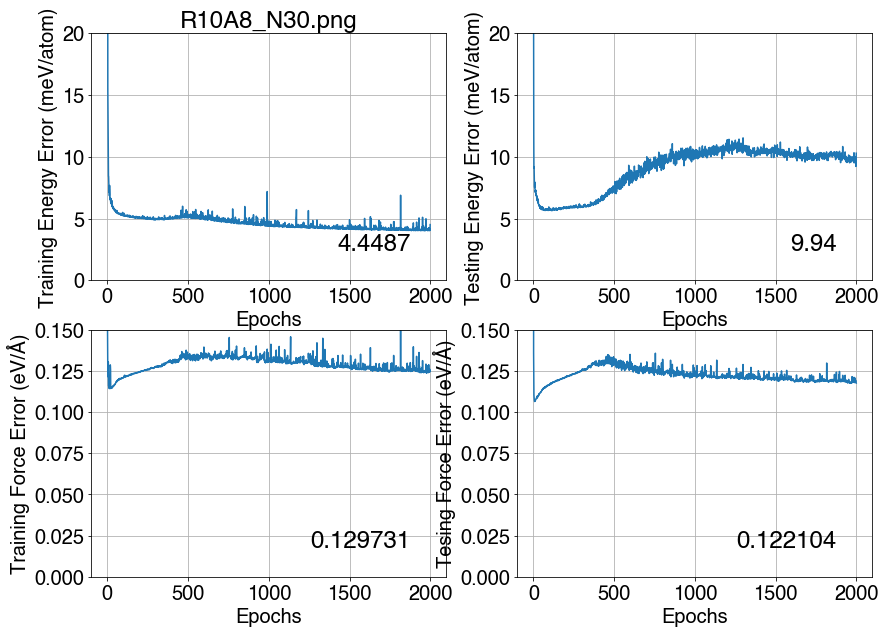

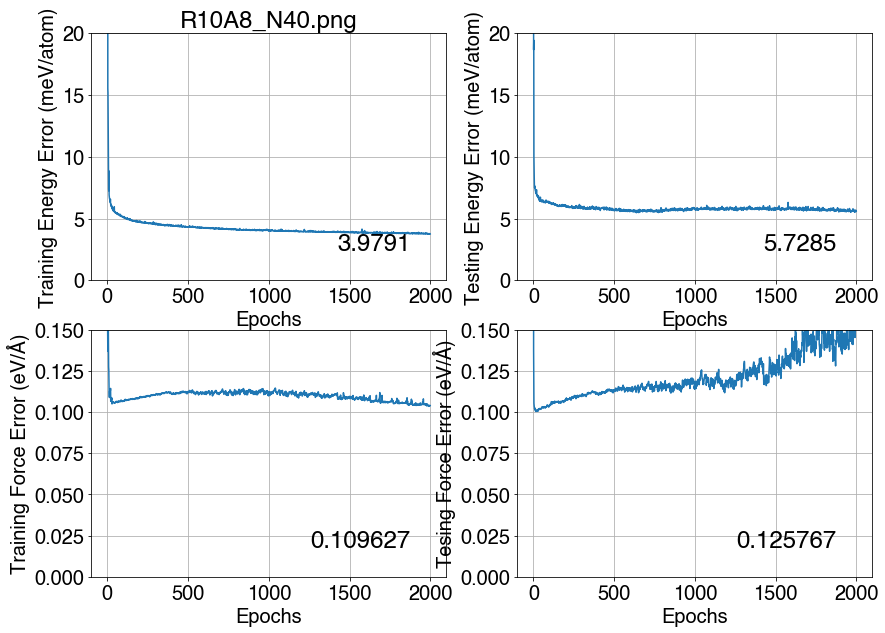

In [3]:
Ermse_train1 = []
Ermse_test1 = []
Frmse_train1 = []
Frmse_test1 = []

# read the file
basis = 'R10A8'
for N in [10, 20, 30, 40]:
    epochs, lines = readinfo(basis+'/N'+str(N))
    E_train, E_test, F_train, F_test = get_error(epochs, lines)
    plot_4fig(epochs, E_train, E_test, F_train, F_test, basis+'_N'+str(N)+'.png')
    Ermse_train1.append(np.mean(E_train[500:]))
    Ermse_test1.append(np.mean(E_test[500:]))
    Frmse_train1.append(np.mean(F_train[500:]))
    Frmse_test1.append(np.mean(F_test[500:]))

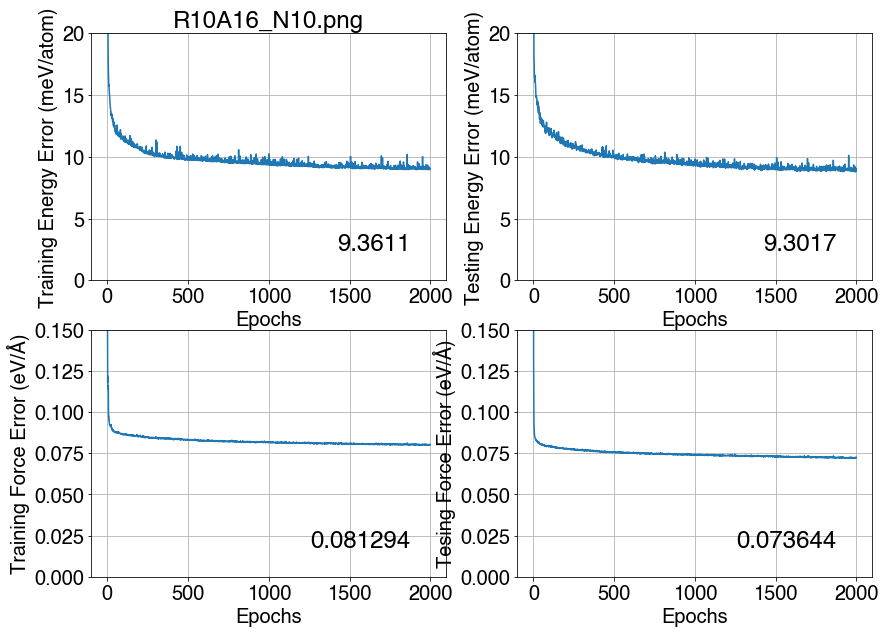

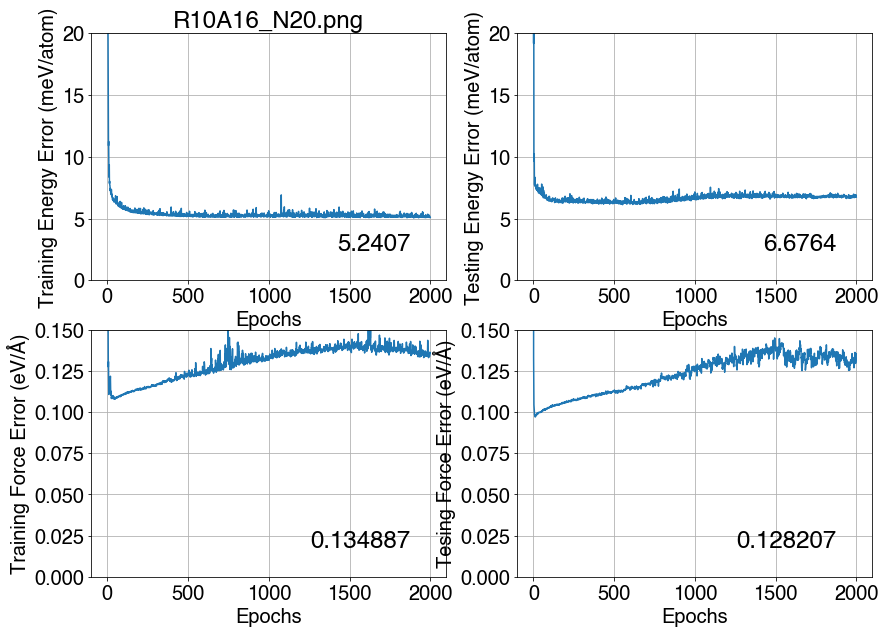

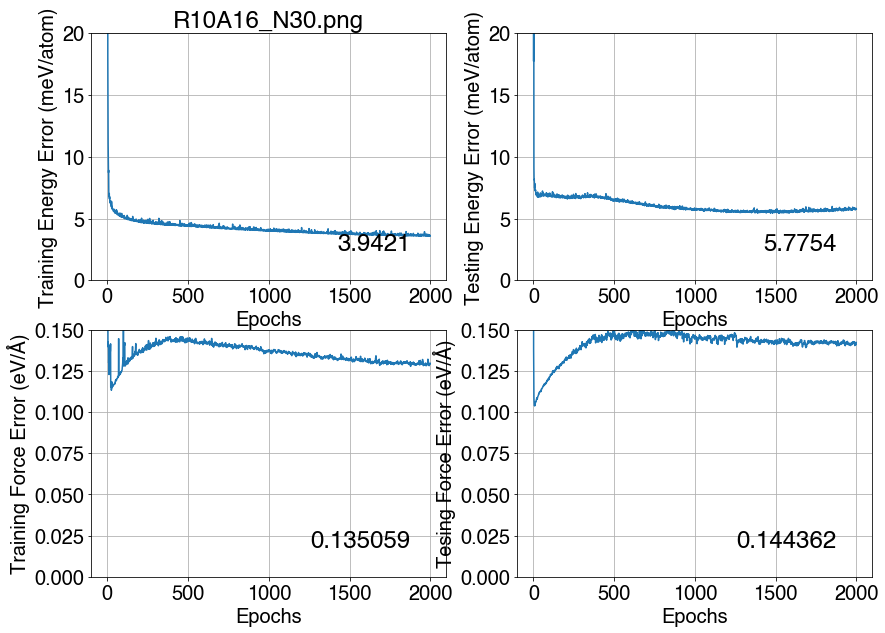

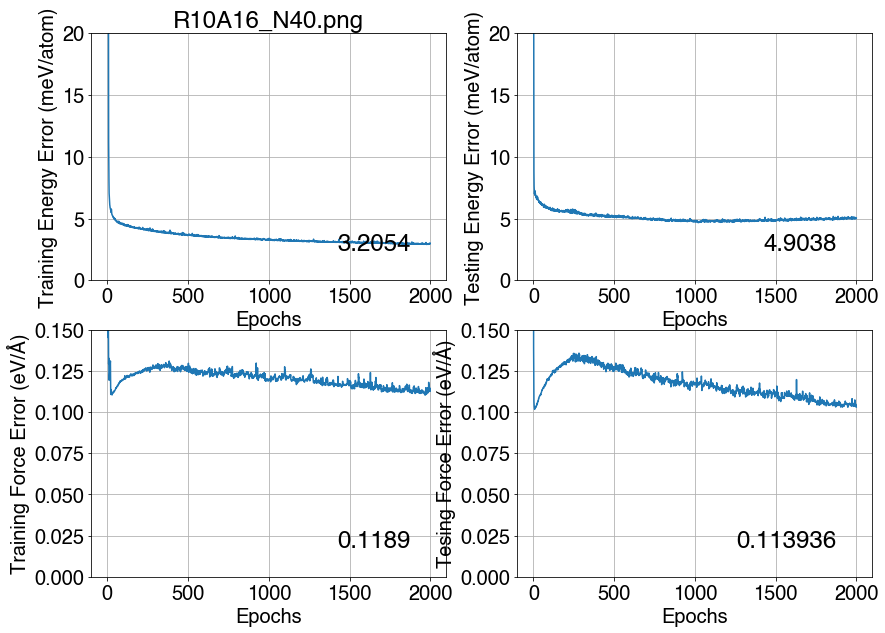

In [4]:
Ermse_train2 = []
Ermse_test2 = []
Frmse_train2 = []
Frmse_test2 = []
# read the file
basis = 'R10A16'
for N in [10, 20, 30, 40]:
    epochs, lines = readinfo(basis+'/N'+str(N))
    E_train, E_test, F_train, F_test = get_error(epochs, lines)
    plot_4fig(epochs, E_train, E_test, F_train, F_test, basis+'_N'+str(N)+'.png')
    Ermse_train2.append(np.mean(E_train[500:]))
    Ermse_test2.append(np.mean(E_test[500:]))
    Frmse_train2.append(np.mean(F_train[500:]))
    Frmse_test2.append(np.mean(F_test[500:]))

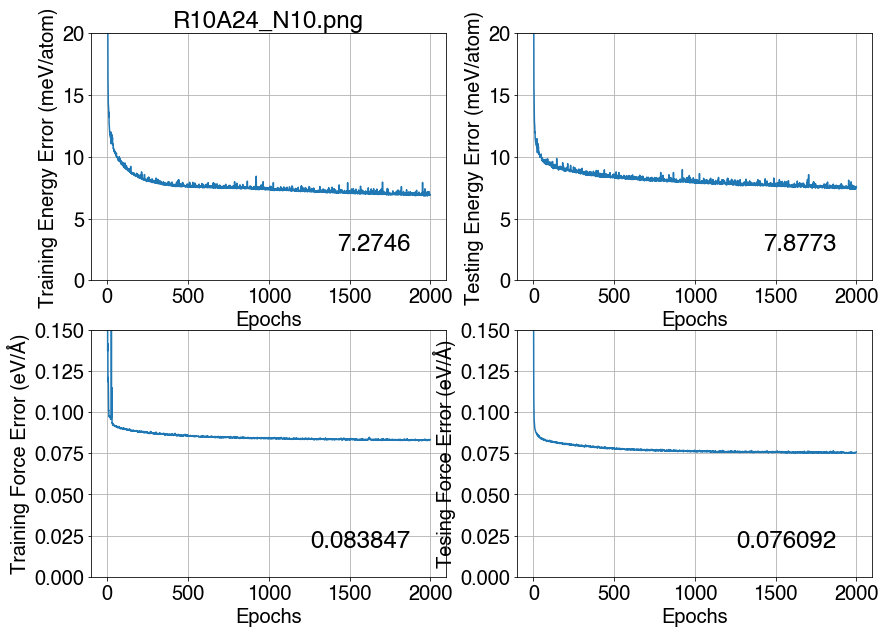

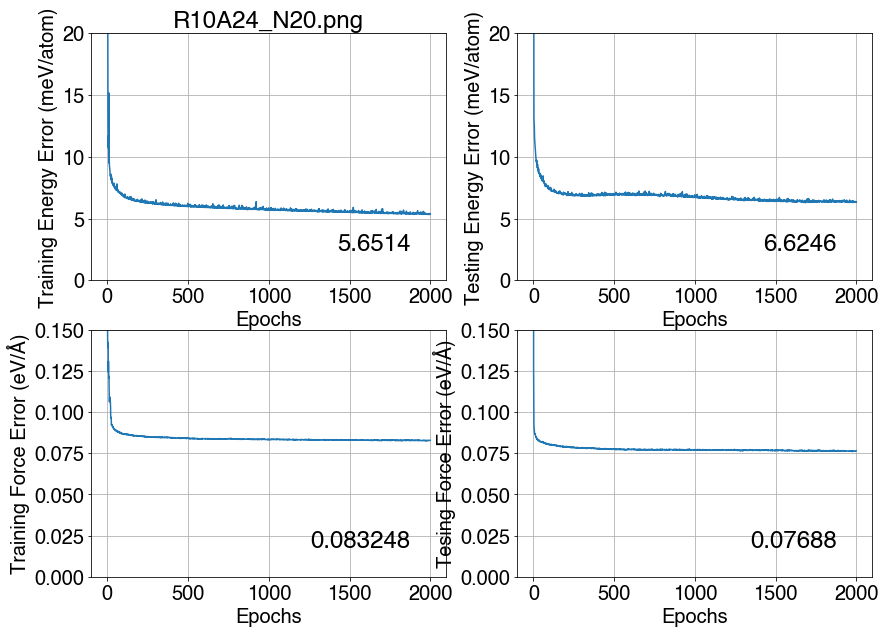

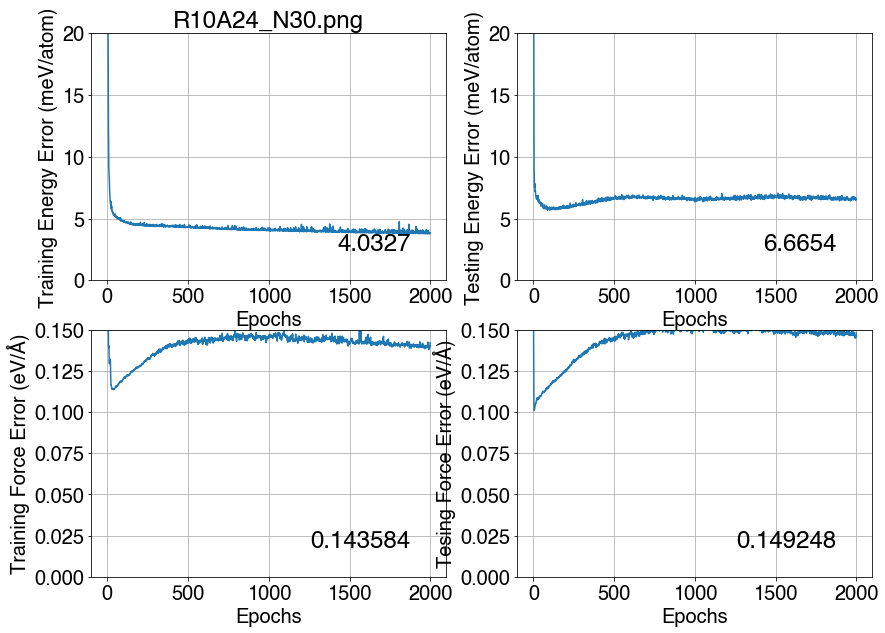

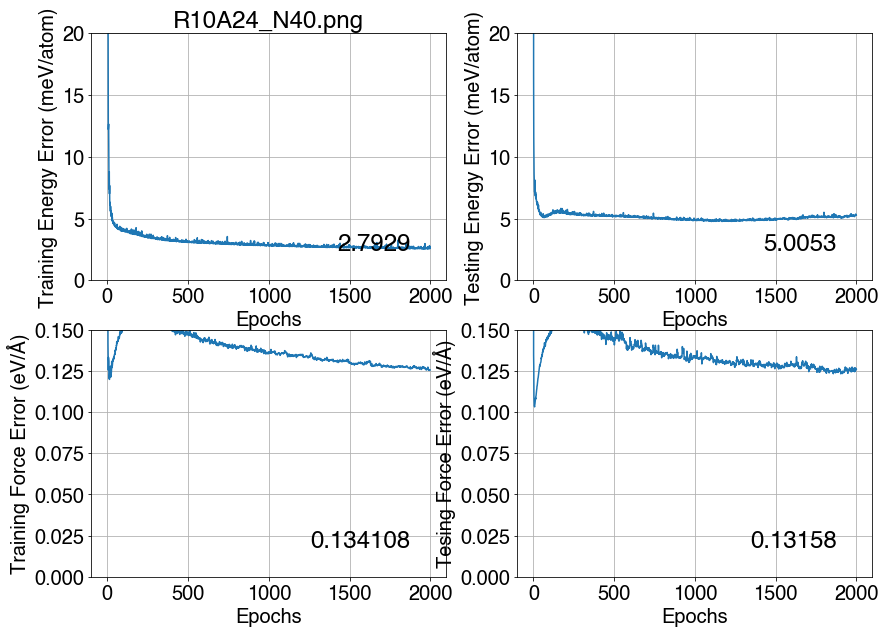

In [5]:
Ermse_train3 = []
Ermse_test3 = []
Frmse_train3 = []
Frmse_test3 = []
# read the file
basis = 'R10A24'
for N in [10, 20, 30, 40]:
    epochs, lines = readinfo(basis+'/N'+str(N))
    E_train, E_test, F_train, F_test = get_error(epochs, lines)
    plot_4fig(epochs, E_train, E_test, F_train, F_test, basis+'_N'+str(N)+'.png')
    Ermse_train3.append(np.mean(E_train[500:]))
    Ermse_test3.append(np.mean(E_test[500:]))
    Frmse_train3.append(np.mean(F_train[500:]))
    Frmse_test3.append(np.mean(F_test[500:]))

In [6]:
E_test.index(min(E_test))

1168

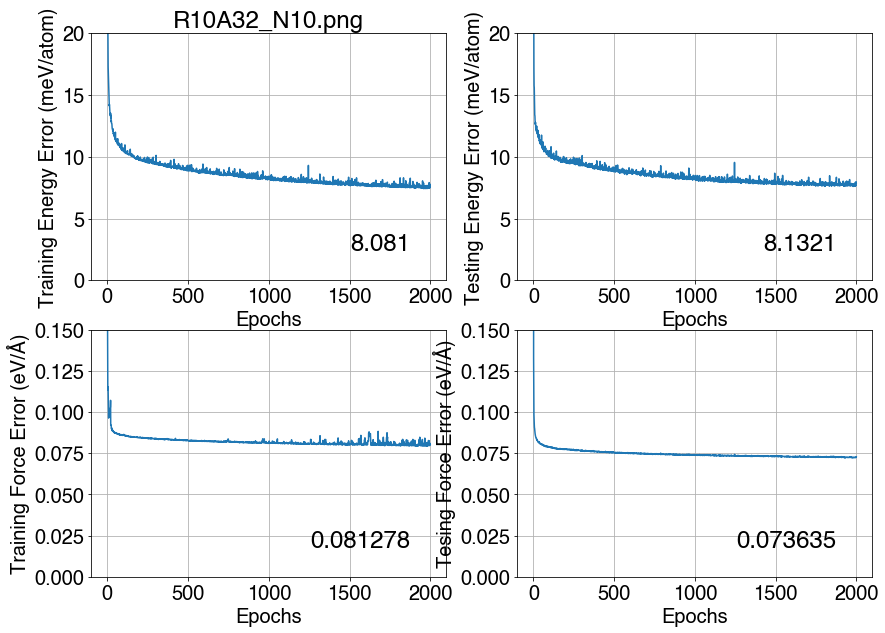

1980


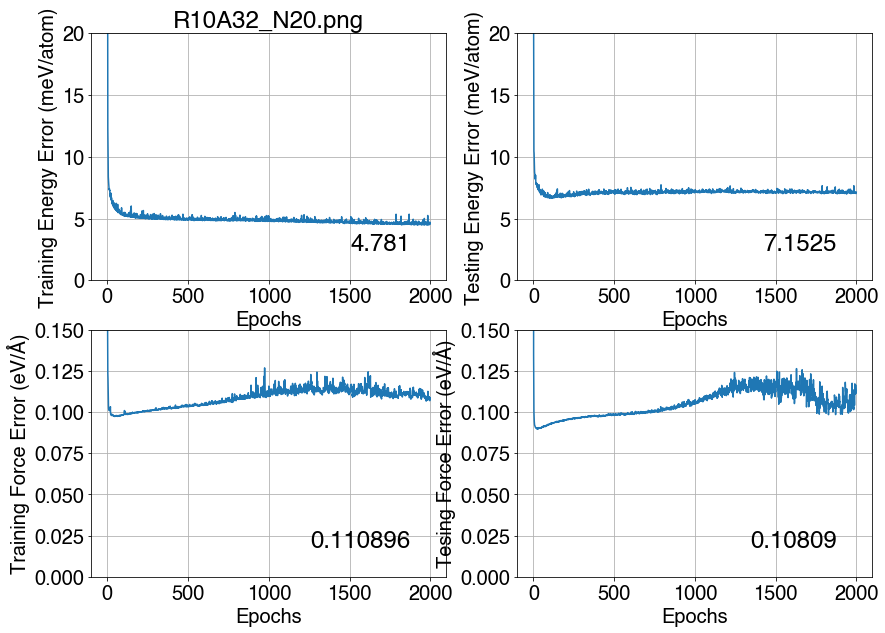

113


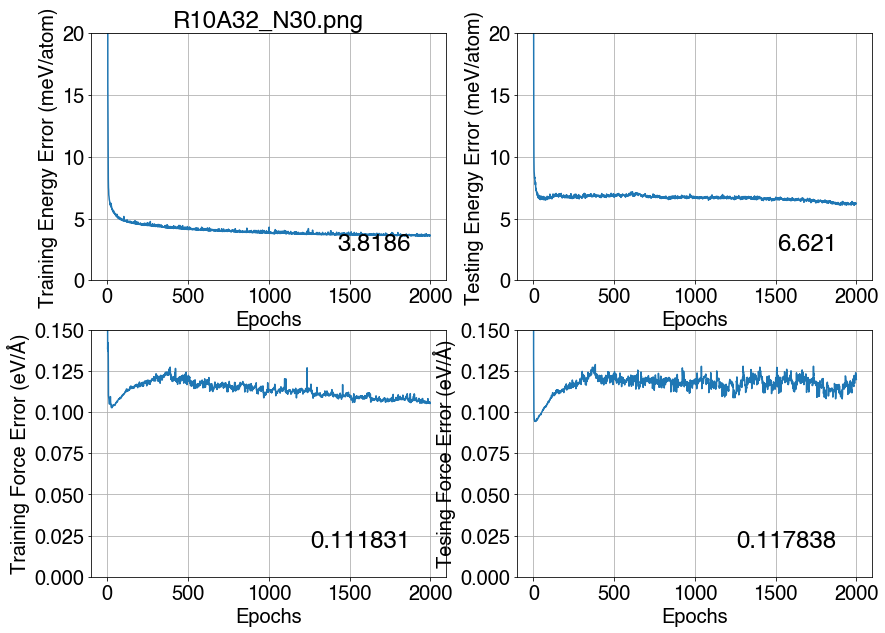

1987


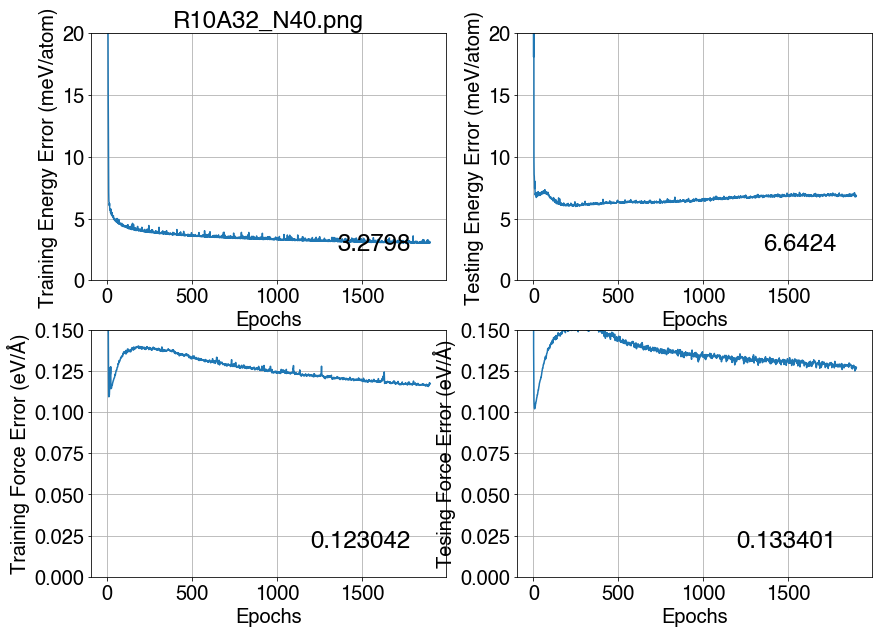

248


In [7]:
Ermse_train4 = []
Ermse_test4 = []
Frmse_train4 = []
Frmse_test4 = []
# read the file
basis = 'R10A32'
for N in [10, 20, 30, 40]:
    epochs, lines = readinfo(basis+'/N'+str(N))
    E_train, E_test, F_train, F_test = get_error(epochs, lines)
    plot_4fig(epochs, E_train, E_test, F_train, F_test, basis+'_N'+str(N)+'.png')
    Ermse_train4.append(np.mean(E_train[500:]))
    Ermse_test4.append(np.mean(E_test[500:]))
    Frmse_train4.append(np.mean(F_train[500:]))
    Frmse_test4.append(np.mean(F_test[500:]))
    print(E_test.index(min(E_test)))